<h2><center><font color="black"><strong>Model for flats in Marseille</strong></font></center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [2]:
    # Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

    # Pipeline & Preprocess
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

    # Scores
from sklearn.metrics import balanced_accuracy_score, make_scorer, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.metrics import mean_absolute_percentage_error

#### Import de la base

In [3]:
#df_Paris = pd.read_csv('../Data/update_data/df_Paris_Processed_Louise.csv', low_memory = False, encoding = 'latin1')
df = pd.read_csv('../Data/df_Marseille_appartement_sansProcess.csv', low_memory = False, encoding = 'latin1')

In [ ]:
max_prix = np.quantile(df.Prix_m2, 0.999)
min_prix = np.quantile(df.Prix_m2, 0.01)

df = df[(df.Prix_m2 < max_prix)
                        & (df.Prix_m2 > min_prix)
                        & (df.code_type_local == 2)]

**Run helpers**

In [4]:
%run '../Helpers/Data_Process.py'

In [5]:
%run '../Helpers/Models.py'

In [6]:
%run '../Helpers/Data_visualisation.py'

#### Visualisation de la base

In [7]:
df.head(4)

,id_mutation,date_mutation,code_type_local,code_commune,surface_terrain,surface_reelle_bati,nombre_pieces_principales,nature_culture,valeur_fonciere,latitude,longitude,nombre_lots,numero_disposition,code_departement,Nombre_unite,Nombre_dependance,Year,num_trimestre,quarter,geometry,index_right,epci_name,iris_code,iris_name,iris_name_l,Prix_m2,Month,Pris_m2_moy_iris,std,Vente_par_iris,Vente_par_iris_tri,N_logements,N_res_ppale,N_res_second,N_vacant,N_maisons,N_apparts,N_proprietaire,N_locataire,DISP_MED19,Ec_maternelle,Ec_elementaire,P19_LOG,P19_RP_SDB,P19_RP_CCCOLL,P19_RP_CCIND,P19_RP_CINDELEC,UU2020,COM,TRIRIS,GRD_QUART,TYP_IRIS,P19_POP1564,P19_POP1524,P19_POP2554,P19_POP5564,P19_ACT1564,P19_CHOM1564,P19_INACT1564,Part_dactifs,Part_chomeurs,Arrondissement,dist_metro
0,2017-61434,2017-07-04,2.0,13214,0.0,17.0,1.0,0,38000.0,43.340614,5.407825,1,1,13,1,0,2017,3,2017_Q3,POINT (5.407825 43.340614),37611.0,"[""MÃÂ©tropole d'Aix-Marseille-Provence""]",132140402,Guyneme,guynemer,2235.294118,7,2290.847996,1004.099017,168,8,1713.0,1568.0,55.0,89.0,545.0,1147.0,622.0,922.0,21110,1,1,1712.999044,1519.831264,89.910402,350.536,1055.133336,759,13214,131751,1321404,H,2053.904144,440.106443,1220.172722,393.624979,1396.346682,158.508479,657.557462,0.67985,0.077174,13214,3646.225312
1,2017-61543,2017-07-12,2.0,13214,0.0,69.0,3.0,0,145200.0,43.347604,5.407354,1,1,13,1,1,2017,3,2017_Q3,POINT (5.407354 43.347604),37611.0,"[""MÃÂ©tropole d'Aix-Marseille-Provence""]",132140402,Guyneme,guynemer,2104.347826,7,2290.847996,1004.099017,168,8,1713.0,1568.0,55.0,89.0,545.0,1147.0,622.0,922.0,21110,1,1,1712.999044,1519.831264,89.910402,350.536,1055.133336,759,13214,131751,1321404,H,2053.904144,440.106443,1220.172722,393.624979,1396.346682,158.508479,657.557462,0.67985,0.077174,13214,4122.255109
2,2017-61757,2017-07-11,2.0,13214,0.0,18.0,1.0,0,30000.0,43.340614,5.407825,1,1,13,1,0,2017,3,2017_Q3,POINT (5.407825 43.340614),37611.0,"[""MÃÂ©tropole d'Aix-Marseille-Provence""]",132140402,Guyneme,guynemer,1666.666667,7,2290.847996,1004.099017,168,8,1713.0,1568.0,55.0,89.0,545.0,1147.0,622.0,922.0,21110,1,1,1712.999044,1519.831264,89.910402,350.536,1055.133336,759,13214,131751,1321404,H,2053.904144,440.106443,1220.172722,393.624979,1396.346682,158.508479,657.557462,0.67985,0.077174,13214,3646.225312
3,2017-62401,2017-09-13,2.0,13214,0.0,81.0,4.0,0,113420.0,43.339718,5.407171,1,1,13,1,1,2017,3,2017_Q3,POINT (5.407171 43.339718),37611.0,"[""MÃÂ©tropole d'Aix-Marseille-Provence""]",132140402,Guyneme,guynemer,1400.246914,9,2290.847996,1004.099017,168,8,1713.0,1568.0,55.0,89.0,545.0,1147.0,622.0,922.0,21110,1,1,1712.999044,1519.831264,89.910402,350.536,1055.133336,759,13214,131751,1321404,H,2053.904144,440.106443,1220.172722,393.624979,1396.346682,158.508479,657.557462,0.67985,0.077174,13214,3545.359196


In [26]:
dummies_pr_var_continues(df, 'dist_metro', 0.01)
dummies_pr_var_continues(df, 'Nombre_dependance', 0)
dummies_pr_var_continues(df, 'Ec_maternelle', 0)
dummies_pr_var_continues(df, 'Ec_elementaire', 0)

## Split temporel : 

In [27]:
df_train = df[df['date_mutation'] < '2021-04-01']
df_test = df[df['date_mutation'] >= '2021-04-01']

In [28]:
df_train = pd.concat([df_train, pd.get_dummies(df_train[['quarter']])], axis = 1)

In [29]:
df_test.shape[0] / (df_test.shape[0] + df_train.shape[0])

0.14148452715862367

In [30]:
df_train['n_pieces_BienStandard'] = df_train['nombre_pieces_principales']-2
df_train['n_dependances_BienStandard'] = df_train['Nombre_dependance']

## Indice de prix : 

In [31]:
features_ols = ['quarter_2017_Q4', 'quarter_2018_Q1', 'quarter_2018_Q2', 'quarter_2018_Q3',
'quarter_2018_Q4', 'quarter_2019_Q1', 'quarter_2019_Q2',
'quarter_2019_Q3', 'quarter_2019_Q4', 'quarter_2020_Q1',
'quarter_2020_Q2', 'quarter_2020_Q3', 'quarter_2020_Q4',
'quarter_2021_Q1',
'n_pieces_BienStandard', 'n_dependances_BienStandard']
outcome = 'Prix_m2'

In [32]:
model = model_OLS_prix(df_train, 'Prix_m2', features_ols, summary = True)

                            OLS Regression Results                            
Dep. Variable:                Prix_m2   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     209.5
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:32:24   Log-Likelihood:            -3.3571e+05
No. Observations:               39672   AIC:                         6.715e+05
Df Residuals:                   39655   BIC:                         6.716e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

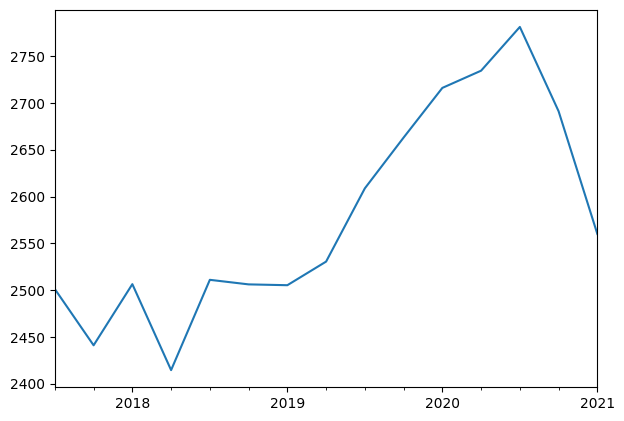

In [33]:
df_train = add_indice_prix(df_train, indice_prix_quarter(model, plot = True))

## Visualisation

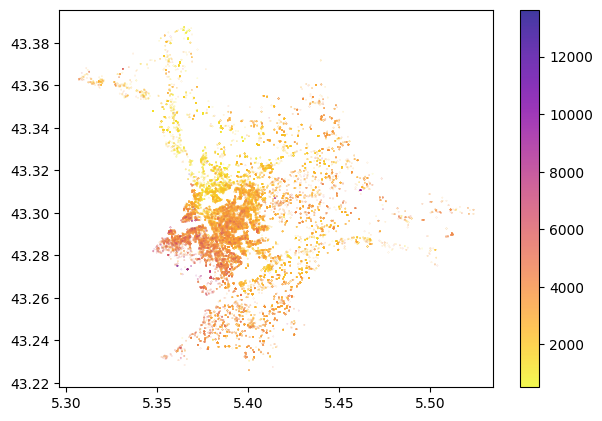

In [34]:
visualise(df, 'Prix_m2')

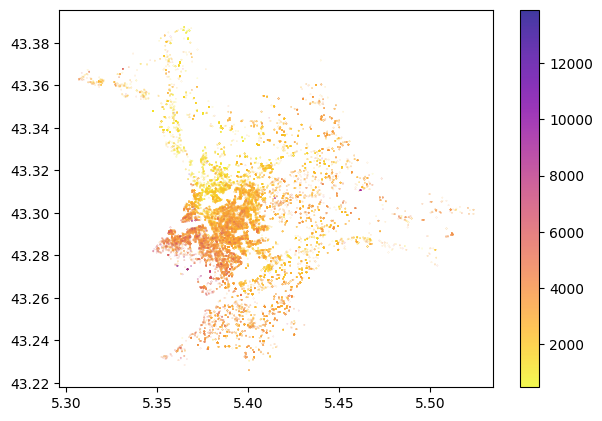

In [35]:
visualise(df_train, 'Prix_m2_actualise_Q1_2021')

## Sélection des features : 

In [53]:
df_test_vif = df[['nombre_pieces_principales','Nombre_dependance',
                  'N_apparts', 'Part_chomeurs', 'Ec_maternelle', 'Ec_elementaire',
                  'dist_metro']]

In [54]:
calc_vif(df_test_vif)

,variables,VIF
0,nombre_pieces_principales,5.470636
1,Nombre_dependance,1.549272
2,N_apparts,6.107739
3,Part_chomeurs,6.659116
4,Ec_maternelle,2.123717
5,Ec_elementaire,2.479255
6,dist_metro,1.318445


## <center> K plus proches voisins sur la latitude/longitude

Les features sont : 
- pour le KNN : 
    - latitude; longitude
- pour le Random Forest ou GBoost:
    - à compléter

In [40]:
    # Dependant variables : cooridnates
features_knn = ['latitude', 'longitude']
    # Output
label_train = 'Prix_m2_actualise_Q1_2021'
label_test = 'Prix_m2'

In [44]:
knn_pipe = model_KNN_coordinates(df_train, df_test, features_knn,
                          label_train, label_test,
                          MinMaxScaler(), 'distance', 25, 5)

Returned hyperparameter: {'Knn__n_neighbors': 23}


In [45]:
    # Scores on TRAIN dataset
compute_scores(knn_pipe, df_train[features_knn], df_train[label_train])

MAPE:  15.221570799510587
MDAPE:  9.812845640376688


In [46]:
    # Scores on TEST dataset
compute_scores(knn_pipe, df_test[features_knn], df_test[label_test])

MAPE:  23.209937933279363
MDAPE:  17.616243562625993


## Etude du score

In [47]:
X_test = df_test.copy()
y_pred = knn_pipe.predict(X_test[features_knn])
X_test["y_pred"] = y_pred
X_test['y_true'] = df_test[label_test]
X_test['mdape'] = np.abs((X_test['y_true'] - X_test["y_pred"])/X_test['y_true'])*100
X_test.head(3)

,id_mutation,date_mutation,code_type_local,code_commune,surface_terrain,surface_reelle_bati,nombre_pieces_principales,nature_culture,valeur_fonciere,latitude,longitude,nombre_lots,numero_disposition,code_departement,Nombre_unite,Nombre_dependance,Year,num_trimestre,quarter,geometry,index_right,epci_name,iris_code,iris_name,iris_name_l,Prix_m2,Month,Pris_m2_moy_iris,std,Vente_par_iris,Vente_par_iris_tri,N_logements,N_res_ppale,N_res_second,N_vacant,N_maisons,N_apparts,N_proprietaire,N_locataire,DISP_MED19,Ec_maternelle,Ec_elementaire,P19_LOG,P19_RP_SDB,P19_RP_CCCOLL,P19_RP_CCIND,P19_RP_CINDELEC,UU2020,COM,TRIRIS,GRD_QUART,TYP_IRIS,P19_POP1564,P19_POP1524,P19_POP2554,P19_POP5564,P19_ACT1564,P19_CHOM1564,P19_INACT1564,Part_dactifs,Part_chomeurs,Arrondissement,dist_metro,dist_metro_dummy,Nombre_dependance_dummy,Ec_maternelle_dummy,Ec_elementaire_dummy,y_pred,y_true,mdape
79,2021-141846,2021-04-20,2.0,13214,0.0,30.0,2.0,0,65000.0,43.337385,5.408406,1,1,13,1,0,2021,2,2021_Q2,POINT (5.408406 43.337385),37611.0,"[""MÃÂ©tropole d'Aix-Marseille-Provence""]",132140402,Guyneme,guynemer,2166.666667,4,3274.771685,1516.728074,168,11,1713.0,1568.0,55.0,89.0,545.0,1147.0,622.0,922.0,21110,1,1,1712.999044,1519.831264,89.910402,350.536,1055.133336,759,13214,131751,1321404,H,2053.904144,440.106443,1220.172722,393.624979,1396.346682,158.508479,657.557462,0.67985,0.077174,13214,3488.794715,1,0,1,1,1564.271636,2166.666667,27.802848
80,2021-141866,2021-04-13,2.0,13214,0.0,14.0,1.0,0,28000.0,43.341552,5.407753,1,1,13,1,0,2021,2,2021_Q2,POINT (5.407753 43.341552),37611.0,"[""MÃÂ©tropole d'Aix-Marseille-Provence""]",132140402,Guyneme,guynemer,2000.000000,4,3274.771685,1516.728074,168,11,1713.0,1568.0,55.0,89.0,545.0,1147.0,622.0,922.0,21110,1,1,1712.999044,1519.831264,89.910402,350.536,1055.133336,759,13214,131751,1321404,H,2053.904144,440.106443,1220.172722,393.624979,1396.346682,158.508479,657.557462,0.67985,0.077174,13214,3703.592630,1,0,1,1,3054.234244,2000.000000,52.711712
81,2021-146474,2021-05-12,2.0,13214,0.0,63.0,3.0,0,230000.0,43.349561,5.407344,1,1,13,1,0,2021,2,2021_Q2,POINT (5.407344 43.349561),37611.0,"[""MÃÂ©tropole d'Aix-Marseille-Provence""]",132140402,Guyneme,guynemer,3650.793651,5,3274.771685,1516.728074,168,11,1713.0,1568.0,55.0,89.0,545.0,1147.0,622.0,922.0,21110,1,1,1712.999044,1519.831264,89.910402,350.536,1055.133336,759,13214,131751,1321404,H,2053.904144,440.106443,1220.172722,393.624979,1396.346682,158.508479,657.557462,0.67985,0.077174,13214,4278.190556,1,0,1,1,2247.279073,3650.793651,38.444095


In [48]:
X_test.groupby('Arrondissement').agg({'mdape' : 'median'}).reset_index().set_index('Arrondissement').T

Arrondissement,13201,13202,13203,13204,13205,13206,13207,13208,13209,13210,13211,13212,13213,13214,13215,13216
mdape,23.53181,24.23183,22.113353,20.84982,19.526947,21.943173,24.080571,16.089414,14.017413,16.248465,14.052243,12.483026,13.233649,17.639329,16.681816,15.133983


In [50]:
fig = px.scatter(X_test, x = 'surface_reelle_bati', y = 'mdape')
fig.update_layout(yaxis_range=[-0.5, 200])
fig.show()

## Random Forest

In [55]:
%run '../Helpers/Models.py'

In [60]:
features_RF = ['nombre_pieces_principales','Nombre_dependance',
                  'N_apparts', 'Part_chomeurs', 'Ec_maternelle', 'Ec_elementaire',
                  'dist_metro', 'DISP_MED19']

In [61]:
RF_model = model_RF_post_KNN(df_test, df_train, features_RF, features_knn, label_train, label_test,
                      model_knn = knn_pipe, standardisation = StandardScaler(), range_depth = [30, 50, 70], nb_cv = 5)

In [62]:
X_train_rf = df_train[features_RF]
X_train_rf['y_pred_knn'] = knn_pipe.predict(df_train[features_knn])
X_test_rf = df_test[features_RF]
X_test_rf['y_pred_knn'] = knn_pipe.predict(df_test[features_knn])
compute_scores(RF_model, X_test_rf, df_test[label_test])

MAPE:  23.119949856579574
MDAPE:  17.125570540031568


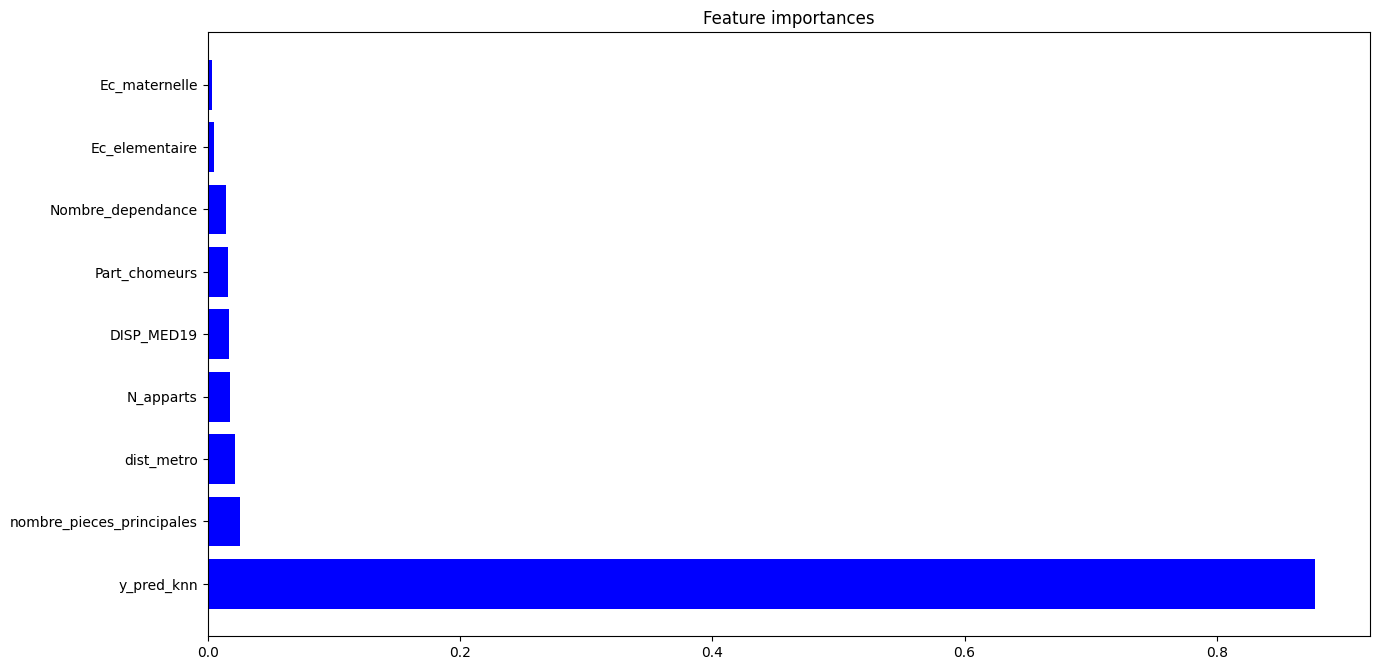

In [63]:
RF_importances = RF_model.best_estimator_.named_steps["RForest"].feature_importances_
features_importances(RF_importances, X_train_rf)